In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [ ]:
#Loading in the dataset
field_data = pd.read_csv("cleaned_field_data.csv")
field_data

,INSTNM,CONTROL,CIPDESC,CREDDESC,MD_EARN_WNE
0,Alabama A & M University,Public,"Computer and Information Sciences, General.",Bachelors Degree,54300
1,Alabama A & M University,Public,Teacher Education and Professional Development...,Bachelors Degree,25400
2,Alabama A & M University,Public,"Electrical, Electronics and Communications Eng...",Bachelors Degree,54500
3,Alabama A & M University,Public,Mechanical Engineering.,Bachelors Degree,45800
4,Alabama A & M University,Public,"Liberal Arts and Sciences, General Studies and...",Bachelors Degree,24000
...,...,...,...,...,...
19091,Inter American University of Puerto Rico - San...,"Private, nonprofit","Biology, General.",Bachelors Degree,12800
19092,Inter American University of Puerto Rico - San...,"Private, nonprofit","Psychology, General.",Bachelors Degree,12800
19093,Inter American University of Puerto Rico - San...,"Private, nonprofit",Criminal Justice and Corrections.,Bachelors Degree,17700
19094,Inter American University of Puerto Rico - San...,"Private, nonprofit","Registered Nursing, Nursing Administration, Nu...",Bachelors Degree,20900


In [ ]:
#Based on further inspection, this dataset has a few duplicate rows, so those are removed in this section. 

new_field_data = field_data.drop_duplicates()
new_field_data

,INSTNM,CONTROL,CIPDESC,CREDDESC,MD_EARN_WNE
0,Alabama A & M University,Public,"Computer and Information Sciences, General.",Bachelors Degree,54300
1,Alabama A & M University,Public,Teacher Education and Professional Development...,Bachelors Degree,25400
2,Alabama A & M University,Public,"Electrical, Electronics and Communications Eng...",Bachelors Degree,54500
3,Alabama A & M University,Public,Mechanical Engineering.,Bachelors Degree,45800
4,Alabama A & M University,Public,"Liberal Arts and Sciences, General Studies and...",Bachelors Degree,24000
...,...,...,...,...,...
19091,Inter American University of Puerto Rico - San...,"Private, nonprofit","Biology, General.",Bachelors Degree,12800
19092,Inter American University of Puerto Rico - San...,"Private, nonprofit","Psychology, General.",Bachelors Degree,12800
19093,Inter American University of Puerto Rico - San...,"Private, nonprofit",Criminal Justice and Corrections.,Bachelors Degree,17700
19094,Inter American University of Puerto Rico - San...,"Private, nonprofit","Registered Nursing, Nursing Administration, Nu...",Bachelors Degree,20900


In [ ]:
#This dataset has 1657 unique schools, with the most rows/majors/data on Ohio State University

new_field_data.groupby("INSTNM").size().sort_values(ascending=False)

INSTNM
Ohio State University-Main Campus            93
Pennsylvania State University-Main Campus    85
University of Minnesota-Twin Cities          76
Arizona State University-Tempe               73
University of Washington-Seattle Campus      71
                                             ..
Southwestern Christian University             1
Southwestern Adventist University             1
Miles College                                 1
Southern University at New Orleans            1
Southern Virginia University                  1
Length: 1657, dtype: int64

In [ ]:
#This dataset has 6405 rows on private nonprofit schools there are versus 12657 rows on public schools 

new_field_data.groupby("CONTROL").size()

CONTROL
Private, nonprofit     6405
Public                12657
dtype: int64

In [ ]:
#This dataset includes 285 different majors, with the most representation from business majors at 1030 schools

new_field_data.groupby("CIPDESC").size().sort_values(ascending=False)

CIPDESC
Business Administration, Management and Operations.                                   1030
Psychology, General.                                                                   850
Registered Nursing, Nursing Administration, Nursing Research and Clinical Nursing.     800
Biology, General.                                                                      656
Teacher Education and Professional Development, Specific Levels and Methods.           599
                                                                                      ... 
Rural Sociology.                                                                         1
Health-Related Knowledge and Skills.                                                     1
Marine Sciences.                                                                         1
Astronomy and Astrophysics.                                                              1
Nursing.                                                                          

In [ ]:
#All degrees in this dataset are Bachelor's 

new_field_data.groupby("CREDDESC").size()

CREDDESC
Bachelors Degree    19062
dtype: int64

In [ ]:
#Split into train and test set
X = new_field_data[["INSTNM", "CONTROL", "CIPDESC", "CREDDESC"]]
y = new_field_data[["MD_EARN_WNE"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#One Hot Encode Categorical Variables 
enc = OneHotEncoder()
enc.fit(X)

enc_train = enc.transform(X_train).toarray()
enc_test = enc.transform(X_test).toarray()

In [ ]:
#Linear Regression Model
reg = LinearRegression().fit(enc_train, y_train)
print("Training Score:" , reg.score(enc_train, y_train))
y_pred = reg.predict(enc_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

Training Score: 0.8426834258156382
MAE: 19128286870522.004
MSE: 1.585730403232248e+29
RMSE: 398212305589901.1
R2 Score: -7.354078927096882e+20


Even though training score is 0.84, the testing R2 is extremely large and also negative, which should not be happening. 

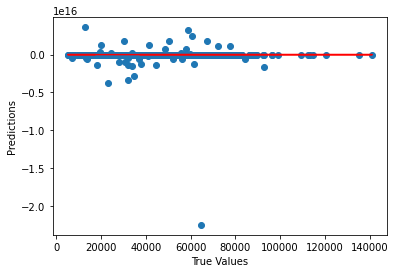

In [ ]:
#Visualization of predictions versus actual salaries
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y_test, y_test, 'r')

In [ ]:
#Looks like the model is predicting numbers both less than 0 and above 1 million dollars 
print(sum(y_pred < 0))
print(sum(y_pred > 1000000))

[62]
[27]


(0.0, 200000.0)

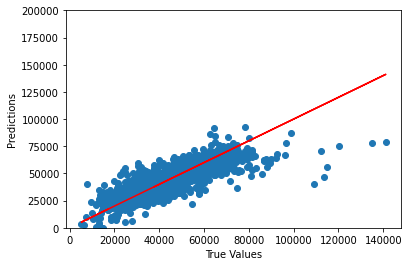

In [ ]:
#Visualization of predictions versus actual salaries, rescaled to positive numbers and under 200,000 dollars
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y_test, y_test, 'r')
plt.ylim(0, 200000)

If taking out outliers, the data does seem kind of linear, although there is a large margin of error. The linear model is not complex enough to account for the spikes and negative numbers it ends up predicting. This data does not fit a linear model. Overall does an awful job at predicting. 